In [116]:
import pandas as pd
import numpy as np

import torch
import random
import torch.backends.cudnn as cudnn
import os
seed= 0
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)  # type: ignore
torch.backends.cudnn.deterministic = True  # type: ignore
torch.backends.cudnn.benchmark = False  # type: ignore

In [117]:
import pickle

save_pickle_path = '/0820_data_inout.pkl' # 경로설정

with open(save_pickle_path, 'rb') as infile:

    (input_ary, output_ary) = pickle.load(infile)

In [118]:
import pandas as pd
pd.set_option('display.max_columns', 200)
data_col = ['SP_1','SP_2','SP_3','SP_4','SP_56','ANGLE_1','ANGLE_2','ANGLE_3','ANGLE_4','ANGLE_5','ANGLE_6','L1_S1','L1_S2','L2_S1','L2_S2','L3_S1','L3_S2','L4_S1','L4_S2','L5_S1','L5_S2','L6_S1','L6_S2','F1','F2','F3','F4','F5']
input_data=pd.DataFrame(input_ary,columns=data_col)

In [119]:
output_data=pd.DataFrame(output_ary)
yield_data=output_data.iloc[:, 64]

In [120]:
analysis=input_data.join(yield_data,how='inner')

In [121]:
analysis=analysis.rename({64:'yield'}, axis=1)

In [122]:
X_data = analysis.iloc[:,:-1]
y_data = analysis.iloc[:,-1]

## TabNet

In [123]:
from sklearn.model_selection import KFold
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import mean_squared_error
import math
fold = KFold(n_splits=5)
n_iter=0
cv_rmse = []
tab_mean=0
for train_index, test_index in fold.split(X_data, y_data):
    n_iter += 1
    X_train= X_data.iloc[train_index]
    X_test= X_data.iloc[test_index]
    y_train= y_data.iloc[train_index]
    y_tests= y_data.iloc[test_index]
    X_train = np.array(X_train)
    y_train = np.reshape(np.array(y_train), (-1,1))
    X_test  = np.array(X_test)
    y_test  = np.reshape(np.array(y_tests), (-1,1))

    tab = TabNetRegressor(seed=0)
    tab.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        patience=60,max_epochs=500,
        )
    preds = tab.predict(X_test)
    rmse=math.sqrt(mean_squared_error(preds, y_tests))
    cv_rmse.append(rmse)
    tab_mean += rmse / 5

Device used : cpu
epoch 0  | loss: 2.0154  | val_0_mse: 486.66472|  0:00:00s
epoch 1  | loss: 1.05677 | val_0_mse: 464.55736|  0:00:00s
epoch 2  | loss: 0.71322 | val_0_mse: 255.53901|  0:00:00s
epoch 3  | loss: 0.5419  | val_0_mse: 5003.24475|  0:00:00s
epoch 4  | loss: 0.344   | val_0_mse: 76424.66973|  0:00:00s
epoch 5  | loss: 0.23666 | val_0_mse: 12199.73883|  0:00:00s
epoch 6  | loss: 0.24124 | val_0_mse: 5374.94105|  0:00:00s
epoch 7  | loss: 0.18979 | val_0_mse: 4220.24603|  0:00:01s
epoch 8  | loss: 0.17891 | val_0_mse: 6902.7239|  0:00:01s
epoch 9  | loss: 0.15715 | val_0_mse: 12.90049|  0:00:01s
epoch 10 | loss: 0.15527 | val_0_mse: 4.04386 |  0:00:01s
epoch 11 | loss: 0.13601 | val_0_mse: 2.03119 |  0:00:01s
epoch 12 | loss: 0.13058 | val_0_mse: 1.03361 |  0:00:02s
epoch 13 | loss: 0.13203 | val_0_mse: 0.60371 |  0:00:02s
epoch 14 | loss: 0.11818 | val_0_mse: 1.69007 |  0:00:02s
epoch 15 | loss: 0.11716 | val_0_mse: 2.25977 |  0:00:02s
epoch 16 | loss: 0.11518 | val_0_mse: 

epoch 58 | loss: 0.07261 | val_0_mse: 56.77709|  0:00:07s
epoch 59 | loss: 0.07168 | val_0_mse: 46.44929|  0:00:07s
epoch 60 | loss: 0.0733  | val_0_mse: 52.36491|  0:00:07s
epoch 61 | loss: 0.07245 | val_0_mse: 76.02832|  0:00:07s
epoch 62 | loss: 0.07017 | val_0_mse: 38.36186|  0:00:07s
epoch 63 | loss: 0.06741 | val_0_mse: 19.77934|  0:00:08s
epoch 64 | loss: 0.07601 | val_0_mse: 28.13618|  0:00:08s
epoch 65 | loss: 0.07052 | val_0_mse: 18.25567|  0:00:08s
epoch 66 | loss: 0.06909 | val_0_mse: 16.37105|  0:00:08s
epoch 67 | loss: 0.07062 | val_0_mse: 15.62784|  0:00:08s
epoch 68 | loss: 0.06849 | val_0_mse: 14.14717|  0:00:08s
epoch 69 | loss: 0.06776 | val_0_mse: 13.71845|  0:00:09s
epoch 70 | loss: 0.06919 | val_0_mse: 12.85721|  0:00:09s
epoch 71 | loss: 0.07036 | val_0_mse: 12.6954 |  0:00:09s
epoch 72 | loss: 0.06697 | val_0_mse: 13.81908|  0:00:09s
epoch 73 | loss: 0.06933 | val_0_mse: 14.59721|  0:00:09s
epoch 74 | loss: 0.06932 | val_0_mse: 11.83886|  0:00:09s
epoch 75 | los

epoch 200| loss: 0.05809 | val_0_mse: 0.2046  |  0:00:26s
epoch 201| loss: 0.05783 | val_0_mse: 0.23084 |  0:00:26s
epoch 202| loss: 0.05812 | val_0_mse: 0.24199 |  0:00:26s
epoch 203| loss: 0.0587  | val_0_mse: 0.25666 |  0:00:26s
epoch 204| loss: 0.0547  | val_0_mse: 0.24499 |  0:00:26s
epoch 205| loss: 0.05951 | val_0_mse: 0.25905 |  0:00:26s
epoch 206| loss: 0.05698 | val_0_mse: 0.26341 |  0:00:26s
epoch 207| loss: 0.05811 | val_0_mse: 0.3007  |  0:00:27s
epoch 208| loss: 0.05877 | val_0_mse: 0.38078 |  0:00:27s
epoch 209| loss: 0.05642 | val_0_mse: 0.3195  |  0:00:27s
epoch 210| loss: 0.05628 | val_0_mse: 0.28595 |  0:00:27s
epoch 211| loss: 0.0566  | val_0_mse: 0.25638 |  0:00:27s
epoch 212| loss: 0.05797 | val_0_mse: 0.23188 |  0:00:27s
epoch 213| loss: 0.05778 | val_0_mse: 0.22643 |  0:00:27s
epoch 214| loss: 0.05868 | val_0_mse: 0.25246 |  0:00:27s
epoch 215| loss: 0.05774 | val_0_mse: 0.24943 |  0:00:27s
epoch 216| loss: 0.05494 | val_0_mse: 0.29642 |  0:00:28s
epoch 217| los

epoch 107| loss: 0.06371 | val_0_mse: 0.15057 |  0:00:15s
epoch 108| loss: 0.05683 | val_0_mse: 0.14809 |  0:00:15s
epoch 109| loss: 0.06334 | val_0_mse: 0.15185 |  0:00:15s
epoch 110| loss: 0.05885 | val_0_mse: 0.15169 |  0:00:15s
epoch 111| loss: 0.06075 | val_0_mse: 0.15691 |  0:00:15s
epoch 112| loss: 0.05694 | val_0_mse: 0.16314 |  0:00:15s
epoch 113| loss: 0.05688 | val_0_mse: 0.17141 |  0:00:15s
epoch 114| loss: 0.05845 | val_0_mse: 0.17693 |  0:00:15s
epoch 115| loss: 0.05846 | val_0_mse: 0.19517 |  0:00:16s
epoch 116| loss: 0.05827 | val_0_mse: 0.17781 |  0:00:16s
epoch 117| loss: 0.06266 | val_0_mse: 0.17706 |  0:00:16s
epoch 118| loss: 0.05723 | val_0_mse: 0.17086 |  0:00:16s
epoch 119| loss: 0.05657 | val_0_mse: 0.1573  |  0:00:16s
epoch 120| loss: 0.05911 | val_0_mse: 0.15321 |  0:00:16s
epoch 121| loss: 0.05625 | val_0_mse: 0.1604  |  0:00:16s
epoch 122| loss: 0.05625 | val_0_mse: 0.17267 |  0:00:17s
epoch 123| loss: 0.05655 | val_0_mse: 0.19017 |  0:00:17s
epoch 124| los

epoch 115| loss: 0.05547 | val_0_mse: 1.17006 |  0:00:18s
epoch 116| loss: 0.05813 | val_0_mse: 1.13476 |  0:00:18s
epoch 117| loss: 0.05641 | val_0_mse: 1.11543 |  0:00:18s
epoch 118| loss: 0.05984 | val_0_mse: 0.97341 |  0:00:18s
epoch 119| loss: 0.057   | val_0_mse: 0.91287 |  0:00:19s

Early stopping occurred at epoch 119 with best_epoch = 59 and best_val_0_mse = 0.1457
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 1.66922 | val_0_mse: 70.84547|  0:00:00s
epoch 1  | loss: 1.12922 | val_0_mse: 152.03895|  0:00:00s
epoch 2  | loss: 0.63774 | val_0_mse: 210.57359|  0:00:00s
epoch 3  | loss: 0.46218 | val_0_mse: 1516.38386|  0:00:00s
epoch 4  | loss: 0.34588 | val_0_mse: 674.88739|  0:00:00s
epoch 5  | loss: 0.26036 | val_0_mse: 528.45688|  0:00:01s
epoch 6  | loss: 0.25878 | val_0_mse: 149.79578|  0:00:01s
epoch 7  | loss: 0.2102  | val_0_mse: 17.40091|  0:00:01s
epoch 8  | loss: 0.13849 | val_0_mse: 208.91413|  0:00:01s
epoch 9  | loss: 0.135

In [124]:
for i in range(5):
    rmse=cv_rmse[i]
    print(f'{i+1}번째 {rmse}')

1번째 0.5213858577612712
2번째 0.3998285666455954
3번째 0.34750785389061006
4번째 0.38170194153542547
5번째 0.33354043310519715


In [125]:
tab_mean

0.3967929305876199

## XGB

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

In [127]:
import xgboost as xgb
from xgboost import plot_importance
from bayes_opt import BayesianOptimization
import warnings
warnings.filterwarnings('ignore')

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'rmse',
              'objective':'reg:squarederror',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7, 1.0)}, random_state=0)
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.2813   |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        | -0.2768   |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        | -0.3105   |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        | -0.2765   |  0.596    |  0.244    |  0.966    |  5.548    |  7.962    |  0.8578   |
|  5        | -0.3129   |  0.9      |  0.1      |  0.0      |  5.213    |  9.0      |  0.7      |
|  6        | -0.2759   |  0.5346   |  0.2854   |  1.0      |  5.002    |  7.684    |  0.8903   |
|  7        | -0.2765   |  0.3      |  0.3      |  1.0      |  6.055    |  7.303    |  1.0      |
|  8        | -0.2758   |  0.3      |  0.3      |  1.0      |  3.534    |  7.955    |  1.0      |


[12:26:32] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stopings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:0.33421	eval-rmse:0.34015
[1]	train-rmse:0.32325	eval-rmse:0.32776
[2]	train-rmse:0.31478	eval-rmse:0.31761
[3]	train-rmse:0.30801	eval-rmse:0.30891
[4]	train-rmse:0.30230	eval-rmse:0.30133
[5]	train-rmse:0.29795	eval-rmse:0.29538
[6]	train-rmse:0.29370	eval-rmse:0.28935
[7]	train-rmse:0.28899	eval-rmse:0.28368
[8]	train-rmse:0.28542	eval-rmse:0.27897
[9]	train-rmse:0.28359	eval-rmse:0.27606
[10]	train-rmse:0.28202	eval-rmse:0.27344
[11]	train-rmse:0.28083	eval-rmse:0.27138
[12]	train-rmse:0.27985	eval-rmse:0.26959
[13]	train-rmse:0.27920	eval-rmse:0.26836
[14]	train-rmse:0.27789	eval-rmse:0.26840
[15]	train-rmse:0.27718	eval-rmse:0.26695
[16]

[37]	train-rmse:0.26544	eval-rmse:0.27733
[38]	train-rmse:0.26544	eval-rmse:0.27733
[39]	train-rmse:0.26396	eval-rmse:0.27615
[40]	train-rmse:0.26398	eval-rmse:0.27615
[41]	train-rmse:0.26397	eval-rmse:0.27615
[42]	train-rmse:0.26397	eval-rmse:0.27615
[43]	train-rmse:0.26395	eval-rmse:0.27615
[44]	train-rmse:0.26393	eval-rmse:0.27617
[45]	train-rmse:0.26393	eval-rmse:0.27617
[46]	train-rmse:0.26292	eval-rmse:0.27685
[47]	train-rmse:0.26293	eval-rmse:0.27684
[48]	train-rmse:0.26292	eval-rmse:0.27685
[49]	train-rmse:0.26292	eval-rmse:0.27686
[12:26:33] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stopings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:0.32907	eval-rmse:0.35937
[1]	train-rmse:0.31780	eval-rmse:0.35048
[2]	train-rmse:0.30954	eval-rmse:0.344

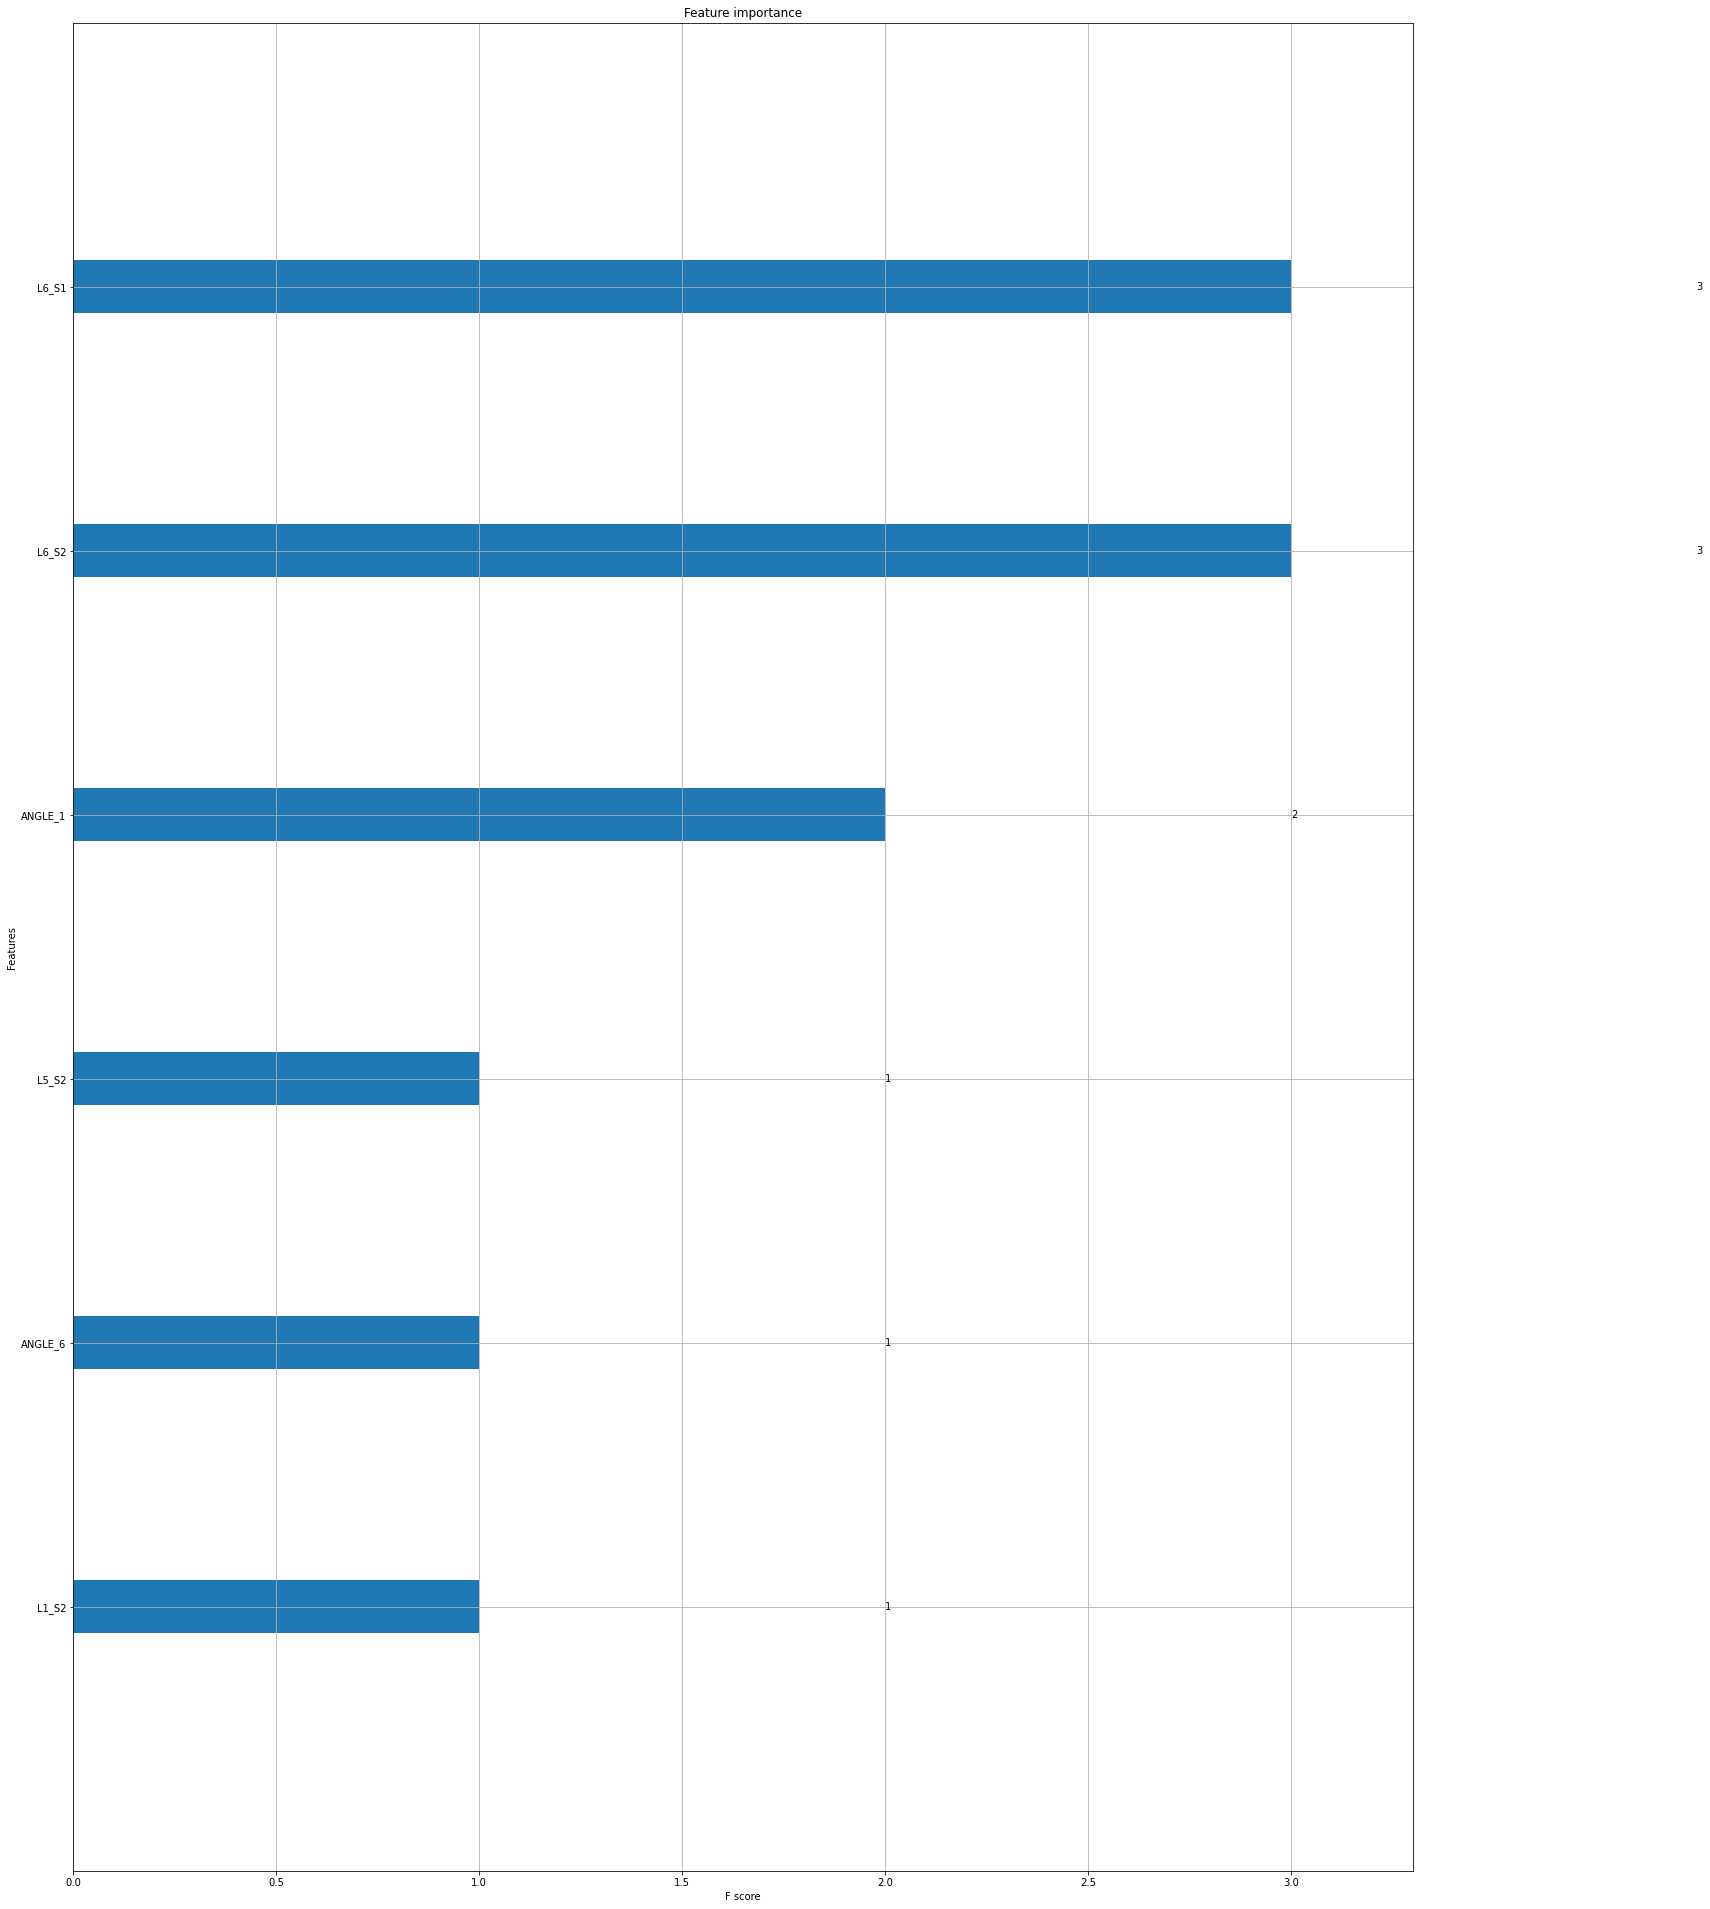

In [128]:
fold = KFold(n_splits=5)
n_iter=0
cv_xgb = []
xgb_mean=0
for train_index, test_index in fold.split(X_data, y_data):
    n_iter += 1
    X_train= X_data.iloc[train_index]
    X_test= X_data.iloc[test_index]
    y_train= y_data.iloc[train_index]
    y_test= y_data.iloc[test_index]
    import xgboost as xgb
    dtrain = xgb.DMatrix(data=X_train, label=y_train)
    dtest = xgb.DMatrix(data=X_test, label=y_test)

    params = {
             'max_depth': 7,
             'eta': 0.1,
             'objective':'reg:squarederror',
             'eval_metric': 'rmse',
             'early_stopings':10,
             'gamma': 1.0,
             'colsample_bytree':0.9,
             'min_child_weight': 6.271,
             'subsample': 0.7
             }
    num_rounds = 500

    wlist = [(dtrain, 'train'),(dtest, 'eval')]
    xgb =xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)

    pred = xgb.predict(dtest)
    xgb_rmse=math.sqrt(mean_squared_error(pred, y_test))
    cv_xgb.append(xgb_rmse)
    xgb_mean+=xgb_rmse/5



    from xgboost import plot_importance #  변수 중요도
    import matplotlib.pyplot as plt
    %matplotlib inline

    fig, ax = plt.subplots(figsize=(24, 34))
    plot_importance(xgb, ax=ax)

In [129]:
for i in range(5):
    rmse=cv_xgb[i]
    print(f'{i+1}번째 {rmse}')

1번째 0.25700037735394493
2번째 0.24198167192085426
3번째 0.2768580829789449
4번째 0.3116602291965178
5번째 0.2800133177962446


In [130]:
xgb_mean

0.2735027358493013

## LGBM

In [131]:
from lightgbm import LGBMRegressor
import lightgbm as lgb

In [132]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):
    model = LGBMRegressor(learning_rate=learning_rate, n_estimators=10000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test, y_test)]
    model.fit(X_train, y_train, eval_metric="rmse", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['rmse']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.278    |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.2798   |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.2793   |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.2813   |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.2802   |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.281    |  0.7807   |  0.1189   |  6.352    |  7.245    |  26.89    |  0.9289   |
|  7        | -0.281    |  0.7989   |  0.1023   |  7.641    |  6.794    |  27.62    |  0.8606   |
|  8        | -0.2778   |  0.7152   |  0.1529   |  3.376    |  6.184    |  26.6     |  0.8573   |
|  9        | -0.278

In [133]:
fold = KFold(n_splits=5)
n_iter=0
cv_lgbm = []
lgbm_mean=0
for train_index, test_index in fold.split(X_data, y_data):
    n_iter += 1
    X_train= X_data.iloc[train_index]
    X_test= X_data.iloc[test_index]
    y_train= y_data.iloc[train_index]
    y_test= y_data.iloc[test_index]
    lgbm = LGBMRegressor(n_estimators=300, learning_rate=0.1565, num_leaves=36, sumbsample=0.8691, colsample_bytree=0.7735, max_depth=10,
                             min_child_weight=5.798)
    evals = [(X_test, y_test)]
    lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='rmse', eval_set=evals, verbose=True)
    preds = lgbm.predict(X_test)
    lgbm_rmse=math.sqrt(mean_squared_error(preds, y_test))
    cv_lgbm.append(lgbm_rmse)
    lgbm_mean+=lgbm_rmse/5

[1]	valid_0's rmse: 0.255602	valid_0's l2: 0.0653324
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.253214	valid_0's l2: 0.0641174
[3]	valid_0's rmse: 0.248686	valid_0's l2: 0.0618449
[4]	valid_0's rmse: 0.24652	valid_0's l2: 0.0607722
[5]	valid_0's rmse: 0.245325	valid_0's l2: 0.0601846
[6]	valid_0's rmse: 0.244154	valid_0's l2: 0.059611
[7]	valid_0's rmse: 0.242938	valid_0's l2: 0.0590189
[8]	valid_0's rmse: 0.24082	valid_0's l2: 0.0579942
[9]	valid_0's rmse: 0.241159	valid_0's l2: 0.0581577
[10]	valid_0's rmse: 0.239628	valid_0's l2: 0.0574215
[11]	valid_0's rmse: 0.23921	valid_0's l2: 0.0572216
[12]	valid_0's rmse: 0.238548	valid_0's l2: 0.056905
[13]	valid_0's rmse: 0.23996	valid_0's l2: 0.0575809
[14]	valid_0's rmse: 0.240188	valid_0's l2: 0.0576903
[15]	valid_0's rmse: 0.240176	valid_0's l2: 0.0576843
[16]	valid_0's rmse: 0.240847	valid_0's l2: 0.0580071
[17]	valid_0's rmse: 0.240706	valid_0's l2: 0.0579393
[18]	valid_0's rmse: 0.241256	valid

[1]	valid_0's rmse: 0.277816	valid_0's l2: 0.0771816
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.275496	valid_0's l2: 0.0758983
[3]	valid_0's rmse: 0.275009	valid_0's l2: 0.0756297
[4]	valid_0's rmse: 0.275131	valid_0's l2: 0.0756972
[5]	valid_0's rmse: 0.277675	valid_0's l2: 0.0771032
[6]	valid_0's rmse: 0.277625	valid_0's l2: 0.0770758
[7]	valid_0's rmse: 0.277173	valid_0's l2: 0.0768248
[8]	valid_0's rmse: 0.277297	valid_0's l2: 0.0768935
[9]	valid_0's rmse: 0.278539	valid_0's l2: 0.0775841
[10]	valid_0's rmse: 0.279218	valid_0's l2: 0.0779629
[11]	valid_0's rmse: 0.280141	valid_0's l2: 0.0784787
[12]	valid_0's rmse: 0.280401	valid_0's l2: 0.0786246
[13]	valid_0's rmse: 0.279556	valid_0's l2: 0.0781513
[14]	valid_0's rmse: 0.280892	valid_0's l2: 0.0789004
[15]	valid_0's rmse: 0.281748	valid_0's l2: 0.0793818
[16]	valid_0's rmse: 0.28143	valid_0's l2: 0.079203
[17]	valid_0's rmse: 0.281321	valid_0's l2: 0.0791415
[18]	valid_0's rmse: 0.280919	v

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's rmse: 0.28149	valid_0's l2: 0.0792365
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 0.280571	valid_0's l2: 0.0787203
[3]	valid_0's rmse: 0.28239	valid_0's l2: 0.079744
[4]	valid_0's rmse: 0.281892	valid_0's l2: 0.0794632
[5]	valid_0's rmse: 0.283288	valid_0's l2: 0.0802523
[6]	valid_0's rmse: 0.282565	valid_0's l2: 0.0798428
[7]	valid_0's rmse: 0.28339	valid_0's l2: 0.0803099
[8]	valid_0's rmse: 0.284084	valid_0's l2: 0.0807038
[9]	valid_0's rmse: 0.284413	valid_0's l2: 0.0808908
[10]	valid_0's rmse: 0.285602	valid_0's l2: 0.0815687
[11]	valid_0's rmse: 0.286822	valid_0's l2: 0.0822671
[12]	valid_0's rmse: 0.287279	valid_0's l2: 0.0825292
[13]	valid_0's rmse: 0.287537	valid_0's l2: 0.0826774
[14]	valid_0's rmse: 0.288843	valid_0's l2: 0.0834304
[15]	valid_0's rmse: 0.288738	valid_0's l2: 0.0833694
[16]	valid_0's rmse: 0.288708	valid_0's l2: 0.0833521
[17]	valid_0's rmse: 0.288976	valid_

In [134]:
for i in range(5):
    rmse=cv_lgbm[i]
    print(f'{i+1}번째 {rmse}')

1번째 0.23854770162042407
2번째 0.24222196180940048
3번째 0.2750085935462259
4번째 0.306892446958668
5번째 0.2805714063189305


In [135]:
lgbm_mean

0.2686484220507298

## Catboost

In [136]:
from category_encoders.ordinal import OrdinalEncoder
from catboost import CatBoostRegressor, Pool

In [137]:
n_est = 2000
seed = 45
n_fold = 5 #fold 수

X=analysis.iloc[:, :-1]
y=analysis.iloc[:, -1]

In [138]:
X

,SP_1,SP_2,SP_3,SP_4,SP_56,ANGLE_1,ANGLE_2,ANGLE_3,ANGLE_4,ANGLE_5,ANGLE_6,L1_S1,L1_S2,L2_S1,L2_S2,L3_S1,L3_S2,L4_S1,L4_S2,L5_S1,L5_S2,L6_S1,L6_S2,F1,F2,F3,F4,F5
0,28.0,26.0,28.0,28.0,493.0,180.0,270.0,90.0,270.0,270.0,180.0,0.442515,0.525762,0.053614,0.168752,0.019468,0.148479,0.205481,0.017360,0.155237,0.713853,0.240824,0.155214,0.360,0.380,0.384,0.383,0.443
1,28.0,28.0,26.0,24.0,497.0,90.0,270.0,0.0,270.0,180.0,0.0,0.442700,0.525710,0.054203,0.168264,0.019107,0.149044,0.205642,0.017524,0.155110,0.713473,0.240843,0.155461,0.360,0.380,0.383,0.384,0.443
2,28.0,28.0,28.0,30.0,493.0,270.0,270.0,0.0,270.0,180.0,180.0,0.442282,0.525652,0.053630,0.168604,0.019629,0.148837,0.205574,0.017938,0.155033,0.713326,0.241038,0.155102,0.360,0.381,0.383,0.383,0.441
3,28.0,28.0,30.0,30.0,492.0,225.0,270.0,135.0,315.0,315.0,180.0,0.442561,0.525580,0.053746,0.168763,0.019377,0.147993,0.205102,0.017605,0.155838,0.714428,0.240919,0.154958,0.361,0.379,0.382,0.383,0.442
4,28.0,26.0,28.0,30.0,493.0,0.0,45.0,0.0,45.0,315.0,90.0,0.442795,0.525435,0.054720,0.169310,0.020319,0.148719,0.205894,0.017623,0.155668,0.713284,0.241035,0.155063,0.361,0.381,0.382,0.384,0.442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,26.0,26.0,28.0,28.0,498.0,90.0,270.0,0.0,225.0,180.0,0.0,0.442700,0.525710,0.054882,0.168189,0.019107,0.149044,0.205642,0.017524,0.155110,0.713473,0.240843,0.155461,0.360,0.380,0.383,0.384,0.443
652,26.0,26.0,28.0,30.0,498.0,90.0,270.0,0.0,225.0,180.0,0.0,0.442700,0.525710,0.054882,0.168189,0.019107,0.149044,0.205642,0.017524,0.155110,0.713473,0.240843,0.155461,0.360,0.380,0.383,0.384,0.443
653,26.0,24.0,28.0,32.0,494.0,315.0,270.0,225.0,315.0,180.0,90.0,0.442800,0.525800,0.054530,0.168647,0.019036,0.147084,0.205212,0.018091,0.154558,0.712324,0.240869,0.154827,0.360,0.380,0.385,0.383,0.443
654,28.0,24.0,28.0,26.0,493.0,180.0,180.0,180.0,0.0,0.0,90.0,0.442713,0.525314,0.054732,0.169486,0.020727,0.149014,0.205266,0.017699,0.156186,0.712164,0.240643,0.154965,0.360,0.380,0.384,0.384,0.442


In [139]:
X=X.astype('str')
X['L1_S1']=X['L1_S1'].astype(float)
X['L1_S2']=X['L1_S2'].astype(float)
X['L2_S1']=X['L2_S1'].astype(float)
X['L2_S2']=X['L2_S2'].astype(float)
X['L3_S1']=X['L3_S1'].astype(float)
X['L3_S2']=X['L3_S2'].astype(float)
X['L4_S1']=X['L4_S1'].astype(float)
X['L4_S2']=X['L4_S2'].astype(float)
X['L5_S1']=X['L5_S1'].astype(float)
X['L5_S2']=X['L5_S2'].astype(float)
X['L6_S1']=X['L6_S1'].astype(float)
X['L6_S2']=X['L6_S2'].astype(float)

In [140]:
lists = X.dtypes[X.dtypes == "object"].index.tolist()

In [141]:
import math
from sklearn.metrics import mean_squared_error
kfold = KFold(n_splits=n_fold, shuffle=True, random_state=seed)
cv_rmse=[]
folds=[]
cat_mean=0
for train_idx, valid_idx in kfold.split(X, y):
        folds.append((train_idx, valid_idx))


for fold in range(n_fold):
    print(f'\n----------------- Fold {fold} -----------------\n')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
    train_data = Pool(data=X_train, label=y_train, cat_features=lists)
    valid_data = Pool(data=X_valid, label=y_valid, cat_features=lists)

    model_reg = CatBoostRegressor()
    model_reg.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)

    reg_preds = model_reg.predict(X_valid)
    rmse=math.sqrt(mean_squared_error(reg_preds, y_valid))
    cv_rmse.append(rmse)
    cat_mean+=rmse / 5


----------------- Fold 0 -----------------

Learning rate set to 0.040779
0:	learn: 0.2785909	test: 0.2659436	best: 0.2659436 (0)	total: 124ms	remaining: 2m 4s
100:	learn: 0.2383228	test: 0.2607668	best: 0.2603766 (93)	total: 7.11s	remaining: 1m 3s
200:	learn: 0.2170674	test: 0.2615957	best: 0.2600924 (154)	total: 13.2s	remaining: 52.4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2600924349
bestIteration = 154

Shrink model to first 155 iterations.

----------------- Fold 1 -----------------

Learning rate set to 0.040794
0:	learn: 0.2815083	test: 0.2549601	best: 0.2549601 (0)	total: 54ms	remaining: 53.9s
100:	learn: 0.2478594	test: 0.2483354	best: 0.2480496 (85)	total: 6.02s	remaining: 53.6s
200:	learn: 0.2239834	test: 0.2475795	best: 0.2469439 (180)	total: 10.8s	remaining: 42.8s
300:	learn: 0.2059562	test: 0.2480094	best: 0.2465167 (245)	total: 16.3s	remaining: 37.9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2465166763
bestIteratio

In [142]:
for i in range(5):
    rmse = cv_rmse[i]
    print(f'{i+1}번째 {rmse}')

1번째 0.2600924354824988
2번째 0.24651667660414667
3번째 0.2650113480244863
4번째 0.28501875163265045
5번째 0.27775308411936567


In [143]:
cat_mean

0.2668784591726296

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
# cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀계수 값들을 DataFrame으로 반환
y_target = analysis['yield']
X_data = analysis.drop(['yield'], axis=1, inplace=False)

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name, '######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso' : model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                        scoring='neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        model.fit(X_data, y_target)
        
        coeff = pd.Series(data=model.coef_, index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

alphas = [0.07, 0.1, 0.5, 1, 3]

In [145]:
# 릿지 회귀
coeff_ridge_df = get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data, y_target_n=y_target)

###### Ridge ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 0.283
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.282
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.282
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.282
alpha 3일 때 5 폴드 세트의 평균 RMSE: 0.282


In [146]:
# 라쏘 회귀
coeff_ridge_df = get_linear_reg_eval('Lasso', params=alphas, X_data_n=X_data, y_target_n=y_target)

###### Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 0.278
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.278
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.277
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.276
alpha 3일 때 5 폴드 세트의 평균 RMSE: 0.276


In [147]:
### 엘라스틱넷 회귀는 L2규제와 L1 규제를 결합한 회귀 
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=alphas,
                                      X_data_n=X, y_target_n=y)

###### ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 0.278
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.278
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.277
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.277
alpha 3일 때 5 폴드 세트의 평균 RMSE: 0.276


## Decision Tree

In [148]:
import pandas as pd 
import numpy as np
import seaborn as sns

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline



In [149]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor()

parameters = {'max_depth':[1,2,3,4], 'min_samples_split':[5,10,15,20]}
grid_dtree = GridSearchCV(dtree, param_grid=parameters, scoring='neg_mean_squared_error',cv=5, refit=True)
grid_dtree.fit(X_data, y_data)
tree_rmse= np.sqrt(-1*grid_dtree.best_score_)

In [150]:
tree_rmse

0.2749975230929241

## Random Forest

In [151]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
params = {
    'n_estimators':(100, 200),
    'max_depth' : (3, 5, 7, 9, 10, 12),
    'min_samples_leaf' : (5, 10, 15, 20, 25, 30)
}
rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_forest = GridSearchCV(rf, param_grid=params, cv=5, scoring='neg_mean_squared_error', refit=True)
grid_forest.fit(X_data, y_data)


forest_rmse= np.sqrt(-1*grid_forest.best_score_)

In [153]:
forest_rmse

0.27113314447530323

## 최종모델 변수중요도(CatBoost)

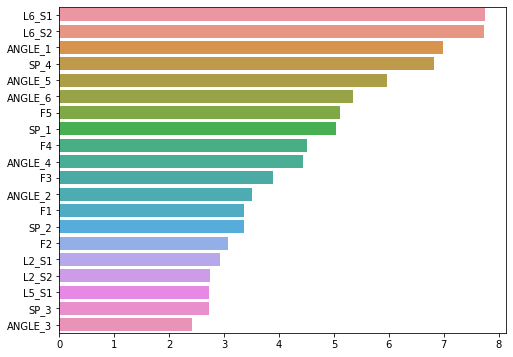

In [154]:
import matplotlib.pyplot as plt # 변수 중요도
import seaborn as sns
%matplotlib inline

ftr_importances_values = model_reg.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_data.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()